# Exercises for Chapter 5: Loss Functions

#### *https://github.com/udlbook/udlbook/tree/main/Notebooks/Chap05*

# A Regression

## 5.1 Creating Loss Functions (Pen&Paper)

Consider building a model to predict the number of pedestrians $y \in \{0,1,2,\dots\}$ that will pass a given point in the city in the next minute, based on data $\mathbf{x}$ that contains information about the time of day, the longitude and latitude, and the type of neighborhood.  
A suitable distribution for modeling counts is the Poisson distribution.  
This has a single parameter $\lambda > 0$ called the *rate* that represents the mean of the distribution.  
The distribution has probability density function:  

$$
Pr(y = k) = \frac{\lambda^k e^{-\lambda}}{k!}.
$$

Design a loss function for this model assuming we have access to $I$ training pairs $\{\mathbf{x}_i, y_i\}$.

---

### Reminder: Recipe for constructing loss functions (Maximum Likelihood approach)

1. **Choose a suitable probability distribution** $Pr(y \mid \theta)$ defined over the domain of the predictions $y$ with distribution parameters $\theta$.
2. **Set the machine learning model** $f(\mathbf{x}, \phi)$ to predict one or more of these parameters, so that $\theta = f(\mathbf{x}, \phi)$ and $Pr(y \mid \theta) = Pr(y \mid f(\mathbf{x}, \phi))$.
3. **Train the model** by finding the parameters $\hat{\phi}$ that minimize the **negative log-likelihood** over the training dataset $\{ \mathbf{x}_i, y_i \}$:  

   $$
   \hat{\phi} = \arg\min_{\phi} \left[ -\sum_{i=1}^I \log Pr(y_i \mid f(\mathbf{x}_i, \phi)) \right].
   $$

4. **Perform inference** for a new test example $\mathbf{x}$ by returning either the full distribution $Pr(y \mid f(\mathbf{x}, \hat{\phi}))$ or the value where this distribution is maximized.


### SOLUTION 

We model $y_i$ as Poisson distributed with rate $\lambda_i > 0$:  

$$
P(y_i \mid \lambda_i) = \frac{\lambda_i^{y_i} e^{-\lambda_i}}{y_i!}.
$$

The log-likelihood for $I$ i.i.d. training pairs $\{(\mathbf{x}_i, y_i)\}_{i=1}^I$ is:  

$$
\ell(\phi) = \sum_{i=1}^I \left[ y_i \log \lambda_i - \lambda_i - \log(y_i!) \right],
$$

where the (raw) network output is $f(\mathbf{x}_i;\phi)$ and the rate is a positive function of it.

The **negative log-likelihood loss** is:  

$$
L(\phi) = -\ell(\phi) = \sum_{i=1}^I \left[ \lambda_i - y_i \log \lambda_i \right] + \text{const},
$$

where the term $\log(y_i!)$ is constant w.r.t. $\phi$ and can be dropped.  
You may divide by $I$ to obtain the average loss.

#### Enforcing $\lambda_i>0$ via squaring the network output

Let the model output be $f(\mathbf{x}_i;\phi)\in\mathbb{R}$ and set
$$
\lambda_i = \big(f(\mathbf{x}_i;\phi)\big)^2.
$$

Plugging this into the general loss:

$$
L(\phi) 
= \sum_{i=1}^I \left[ \big(f(\mathbf{x}_i;\phi)\big)^2 \;-\; y_i \log\!\left(\big(f(\mathbf{x}_i;\phi)\big)^2\right) \right] + \text{const}.
$$

## 5.2 Empirically demonstrating the equivalence between MSE and Negative Log-Likelihood Minimization

In this exercise we will empirically show, that maximizing the likelihood of the data given the model i.e. minimizing the negative log-likelihood is identical to minimizing the mean squared error (MSE).


In [22]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Define ground truth parameters (Beta_0 and Beta_1) for a univariate regression problem
beta0, beta1 = -0.5, 1

# Number of data points for random sample
n = 100

# Random number generator for reproducible results
rng = np.random.default_rng(42)

In [ ]:
### TASK
# TODO: Sample input variable x uniformly between 0 and 1
x = np.zeros(n)

In [ ]:
### SOLUTION
# Sample input variable x uniformly between 0 and 1
x = rng.uniform(low=0, high=1, size=n)

In [ ]:
### TASK
# TODO: Function that takes as input the intercept (beta0), 
# the slope (beta_1) and the x-value(s) and returns the predicted y-value(s)

In [ ]:
### SOLUTION
# Function that takes as input the intercept (beta0), 
# the slope (beta_1) and the x-value(s) and returns the predicted y-value(s)
def compute_y(beta0, beta1, x):
    return beta0 + beta1 * x

In [28]:
# Compute y based on true parameters + random noise
y = compute_y(beta0, beta1, x) + rng.normal(loc=0, scale=0.2, size=n)

In [29]:
### TASK
# TODO: Visualize the generated data

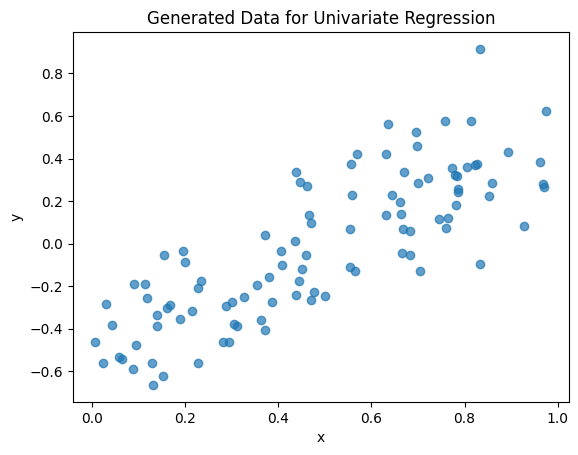

In [30]:
### SOLUTION
# Visualize the generated data
plt.scatter(x, y, alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Univariate Regression')
plt.show()

In [ ]:
# Let's see what OLS would give us (Note that it minimizes MSE)
X = np.vstack([np.ones(n), x]).T
ols_params = np.linalg.lstsq(X, y)[0]
print(f'OLS Estimates: beta_0 = {ols_params[0]:.4f}, beta_1 = {ols_params[1]:.4f}')

OLS Estimates: beta_0 = -0.5103, beta_1 = 1.0153


In [32]:
# Let's compute the variance of the residuals from OLS to use in NLL calculation
ols_residuals = y - compute_y(ols_params[0], ols_params[1], x)
sigma2 = np.var(ols_residuals)

### Now let's see what different combinations of the parameters would have led to in terms of MSE and Negative Log Likelihood

In [33]:
# Function to compute residuals
def compute_residuals(beta0, beta1, x, y):
    y_pred = compute_y(beta0, beta1, x)
    return y - y_pred

In [34]:
# Function to compute MSE
def compute_mse(beta0, beta1, x, y):
    residuals = compute_residuals(beta0, beta1, x, y)
    mse = np.mean(residuals**2)
    return mse

In [35]:
### TASK
# TODO: Function to compute Negative Log Likelihood (with FIXED sigma^2)
def compute_nll(beta0, beta1, x, y):
    pass

In [36]:
### SOLUTION
# Function to compute Negative Log Likelihood (with FIXED sigma^2)
def compute_nll(beta0, beta1, x, y):
    residuals = compute_residuals(beta0, beta1, x, y)
    nll = 0.5 * np.sum(np.log(2 * np.pi * sigma2) + (residuals ** 2) / sigma2)
    return nll

In [37]:
### TASK
# Create a grid over which to plot the negative log-likelihood
beta0_grid = np.linspace(beta0 - 1, beta0 + 1, 100)
beta1_grid = np.linspace(beta1 - 1, beta1 + 1, 100)

# Initialize Z arrays for MSE and NLL
Z_mse = np.zeros((len(beta0_grid), len(beta1_grid)))
Z_nll = np.zeros((len(beta0_grid), len(beta1_grid)))

# TODO: Compute MSE and NLL over the entire grid
for i, b0 in enumerate(beta0_grid):
    for j, b1 in enumerate(beta1_grid):
        Z_mse[i, j] = 0
        Z_nll[i, j] = 0

In [38]:
### SOLUTION
# Create a grid over which to plot the negative log-likelihood
beta0_grid = np.linspace(beta0 - 1, beta0 + 1, 100)
beta1_grid = np.linspace(beta1 - 1, beta1 + 1, 100)

# Initialize Z arrays for MSE and NLL
Z_mse = np.zeros((len(beta0_grid), len(beta1_grid)))
Z_nll = np.zeros((len(beta0_grid), len(beta1_grid)))

# Compute MSE and NLL over the entire grid
for i, b0 in enumerate(beta0_grid):
    for j, b1 in enumerate(beta1_grid):
        Z_mse[i, j] = compute_mse(b0, b1, x, y)
        Z_nll[i, j] = compute_nll(b0, b1, x, y)

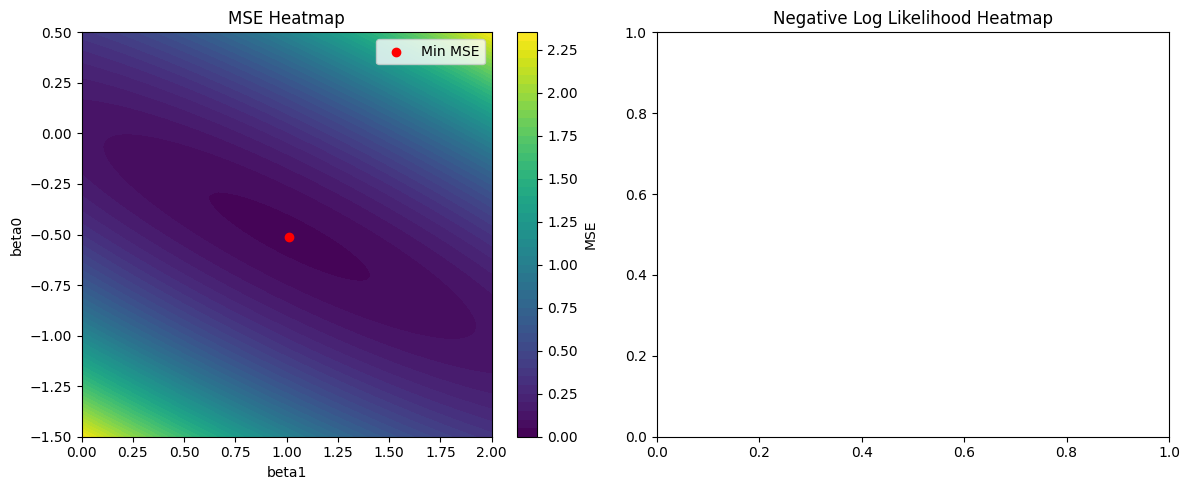

In [ ]:
### TASK
# Create meshgrid for contour plots
# (meshgrid creates coordinate matrices from coordinate vectors)
X1, X2 = np.meshgrid(beta1_grid, beta0_grid)

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MSE Heatmap
axes[0].set_title('MSE Heatmap')
axes[0].set_xlabel('beta1')
axes[0].set_ylabel('beta0')
mse_plot = axes[0].contourf(X1, X2, Z_mse, levels=50, cmap='viridis')
fig.colorbar(mse_plot, ax=axes[0], label='MSE')
min_idx = np.unravel_index(np.argmin(Z_mse), Z_mse.shape)
b0_min = beta0_grid[min_idx[0]]
b1_min = beta1_grid[min_idx[1]]
axes[0].scatter(b1_min, b0_min, color='red', label='Min MSE')
axes[0].legend()

# TODO: Provide the same heatmap as above identically for the Negative Log Likelihood
axes[1].set_title('Negative Log Likelihood Heatmap')

plt.tight_layout()
plt.show()

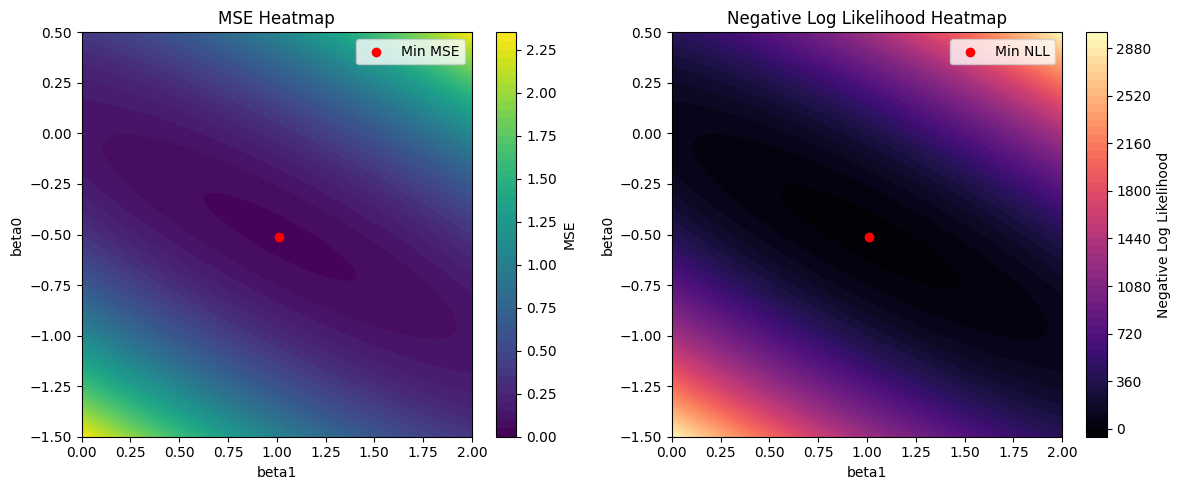

In [40]:
### SOLUTION
# Create meshgrid for contour plots
# (meshgrid creates coordinate matrices from coordinate vectors)
X1, X2 = np.meshgrid(beta1_grid, beta0_grid)

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MSE Heatmap
axes[0].set_title('MSE Heatmap')
axes[0].set_xlabel('beta1')
axes[0].set_ylabel('beta0')
mse_plot = axes[0].contourf(X1, X2, Z_mse, levels=50, cmap='viridis')
fig.colorbar(mse_plot, ax=axes[0], label='MSE')
min_idx = np.unravel_index(np.argmin(Z_mse), Z_mse.shape)
b0_min = beta0_grid[min_idx[0]]
b1_min = beta1_grid[min_idx[1]]
axes[0].scatter(b1_min, b0_min, color='red', label='Min MSE')
axes[0].legend()

# Negative Log Likelihood Heatmap
axes[1].set_title('Negative Log Likelihood Heatmap')
axes[1].set_xlabel('beta1')
axes[1].set_ylabel('beta0')
nll_plot = axes[1].contourf(X1, X2, Z_nll, levels=50, cmap='magma')
fig.colorbar(nll_plot, ax=axes[1], label='Negative Log Likelihood')
min_idx = np.unravel_index(np.argmin(Z_nll), Z_nll.shape)
b0_max = beta0_grid[min_idx[0]]
b1_max = beta1_grid[min_idx[1]]
axes[1].scatter(b1_max, b0_max, color='red', label='Min NLL')
axes[1].legend()

plt.tight_layout()
plt.show()

These results empirically confirm that when the data noise is assumed Gaussian, minimizing the Mean Squared Error (MSE) is mathematically equivalent to minimizing the Negative Log Likelihood (NLL). Thus, using the MSE loss in a neural network implicitly corresponds to maximizing the likelihood of the observed data under a normal error model.

# B Classification

## 5.3 Binary Cross-Entropy Loss

The loss $L$ for binary classification for a single training pair $\{\mathbf{x_i}, y_i\}$ is:

$$
L = - (1 - y_i) \log \left[ 1 - \operatorname{sig}\left( f[\mathbf{x_i}, \boldsymbol{\phi}] \right) \right] 
    - y_i \log \left[ \operatorname{sig}\left( f[\mathbf{x_i}, \boldsymbol{\phi}] \right) \right],
$$

In [99]:
### TASK
# TODO: Plot this loss as a function of the transformed network output:
# 1. when the training label $y_i = 0$  
# 2. when $y_i = 1$

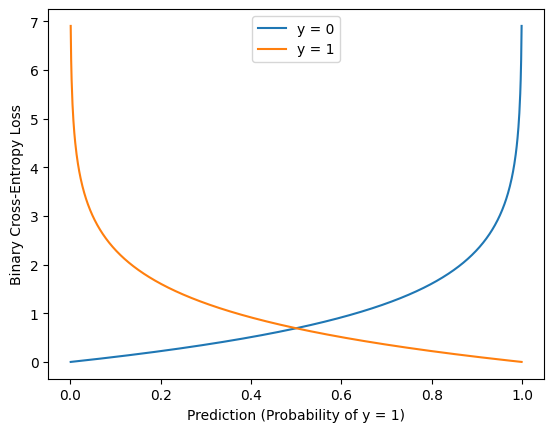

In [100]:
### SOLUTION
# imports
import numpy as np
import matplotlib.pyplot as plt

# function to calculate cross-etnropy 
def cross_entropy(y_hat, y):
    return -(1-y) * np.log(1 - y_hat) - y * np.log(y_hat)

# network outputs (fitted values)
y_hats = np.arange(0.001, 1, 0.001)

# plot
plt.plot(y_hats, cross_entropy(y_hats, 0), label="y = 0")
plt.plot(y_hats, cross_entropy(y_hats, 1), label="y = 1")
plt.xlabel("Prediction (Probability of y = 1)")
plt.ylabel("Binary Cross-Entropy Loss")
plt.legend()
plt.show()

## 5.4 Multiclass Classification: Softmax and Cross-Entropy


**TASK**

Think of three examples, where we might get five different classes, and we wish to predict the probability that a certain input belongs to each. Explicitly define input and output of the model.


**SOLUTION**

1. **Input**: Newspaper article, **Output**: Economic sentiment (very negative, mildly negative, neutral, mildly positive, very positive)
2. **Input**: Animal photo, **Output**: Animal type (Mammal, Bird, Reptile, Amphibian, Fish)
3.  **Input**: Firm characteristics, **Output**: Liquidity rating (A, B, C, D, E)


In [101]:
# To see how the Softmax activation function acts on the output of the neural network, 
# let's first create 5 random numbers (the logits, i.e. raw outputs of the model)
n_classes = 5
logits = rng.standard_normal(n_classes)

In [102]:
### TASK
# TODO: Define the softmax activation function, which takes as input the logits 
# (output of the neural network) and produces probabilities from it

In [103]:
### SOLUTION
def softmax(logits):
    probabilities =  np.exp(logits) / np.sum(np.exp(logits))
    return probabilities

In [104]:
### TASK
# TODO: Find a sensible way to visualize how the logits we created translate into probabilities

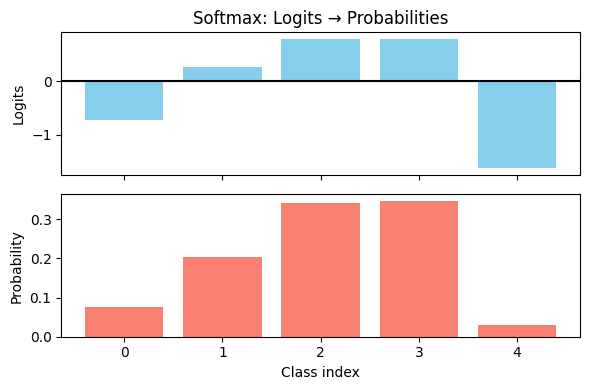

In [105]:
### SOLUTION
# Calculate class probabilities
probs = softmax(logits)

# create figure with two rows
fig, axes = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# top: logits
axes[0].bar(range(len(logits)), logits, color='skyblue')
axes[0].axhline(0, color='black')
axes[0].set_ylabel("Logits")
axes[0].set_title("Softmax: Logits → Probabilities")

# bottom: probabilities
axes[1].bar(range(len(probs)), probs, color='salmon')
axes[1].set_ylabel("Probability")
axes[1].set_xlabel("Class index")

# depict the plot
plt.tight_layout()
plt.show()


**TASK**: Explain why the Softmax activation function is special compared to other activation functions.

**SOLUTION**:
- **Placement:**  
  - Usual activations (ReLU, sigmoid, tanh) → applied element-wise in hidden layers.  
  - Softmax → applied once to the whole output vector.
- **Coupling:**  
  - Normal activations treat each neuron independently.  
  - Softmax output for one neuron depends on all other outputs.
- **Purpose:**  
  - Hidden-layer activations → add nonlinearity for learning complex patterns.  
  - Softmax → normalize outputs into a probability distribution.

The loss \(L\) for **multiclass classification** for a single training pair $\{\mathbf{x}, \mathbf{y}\}$, where $\mathbf{y} = (y_1, \dots, y_K)^\top$ is a one-hot encoded target vector, is:

$$
L = - \sum_{k=1}^K y_k \log \left[ \operatorname{softmax}_k \left( f[\mathbf{x}, \boldsymbol{\phi}] \right) \right]
$$

In [106]:
### TASK: Write a function for the above loss and compute the resulting loss for 
# a hypothetical 3-class classification problem 
def multiclass_cross_entropy(y_hat, y):
    pass

In [116]:
### SOLUTION
def multiclass_cross_entropy(y_hat, y):
    assert len(y_hat) == len(y), "Predictions and true labels must have the same length!"
    assert np.sum(y_hat) == 1, "Predictions must sum to 1"
    assert np.sum(y) == 1, "True label vector is not one hot encoded properly"
    return -np.log(y_hat[np.where(y)])

In [117]:
### TASK
# TODO: Experiment a bit with this function (different output lengths, different probabilities)
#       to  get a real feeling, how the multiclass-classification loss function behaves.
#       Note that the preidctions vector has to add up to 1 and the true labels have to be one hot encoded
multiclass_cross_entropy(y_hat=np.array([0.1, 0.05, 0.8, 0.05]),
                         y=np.array([0, 1, 0, 0]))

array([2.99573227])